In [56]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import *

QUANTUM RANDOM NUMBER GENERATOR

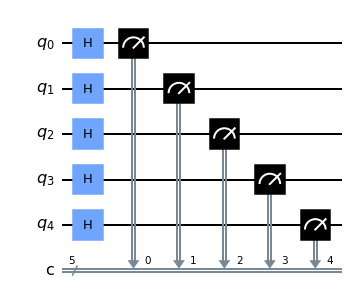

In [57]:
Circ = QuantumCircuit(5,5)
Circ.h(range(5))
Circ.measure(range(5),range(5))
Circ.draw(output='mpl')

{'00001': 10, '10101': 23, '01110': 17}


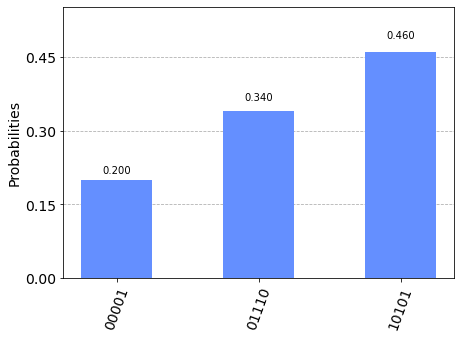

In [67]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend,shots=50).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [74]:
maximum = 0
key_list = list(counts.keys())
val_list = list(counts.values())
for value in counts:
    if counts[value] > maximum:
        maximum = counts[value]

# Random number be the number with higher probability
# And converting Binary Number to Decimal Number
# In this case '10101' is with high probability and it is '21' in Decimal number system
print("The Random Number generated is: ", int(key_list[val_list.index(maximum)],2))

The Random Number generated is:  21


In [2]:
# Half Adder
# for input 0 and 1
circuit = QuantumCircuit(4,2)
circuit.x(1)
circuit.barrier()
circuit.cx(0,2)
circuit.cx(1,2)
circuit.ccx(0,1,3)
circuit.measure(2,0)
circuit.measure(3,1)
circuit.draw()

░                      
q_0: ──────░───■─────────■────────
     ┌───┐ ░   │         │        
q_1: ┤ X ├─░───┼────■────■────────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼──┤M├───
           ░ └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ──────░───────────┤ X ├─╫─┤M├
           ░           └───┘ ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

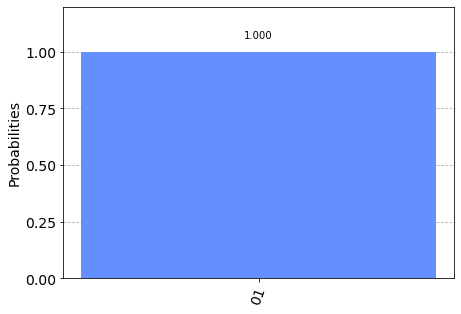

In [4]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend,shots=50).result()
counts = result.get_counts()
plot_histogram(counts)

In [6]:
# for input 1 and 1
circuit = QuantumCircuit(4,2)
circuit.x(range(2))
circuit.barrier()
circuit.cx(0,2)
circuit.cx(1,2)
circuit.ccx(0,1,3)
circuit.measure(2,0)
circuit.measure(3,1)
circuit.draw()

┌───┐ ░                      
q_0: ┤ X ├─░───■─────────■────────
     ├───┤ ░   │         │        
q_1: ┤ X ├─░───┼────■────■────────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼──┤M├───
           ░ └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ──────░───────────┤ X ├─╫─┤M├
           ░           └───┘ ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

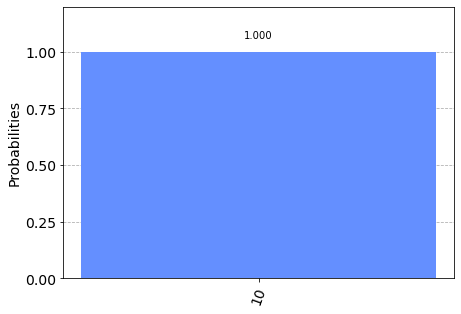

In [7]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend,shots=50).result()
counts = result.get_counts()
plot_histogram(counts)

FULL ADDER

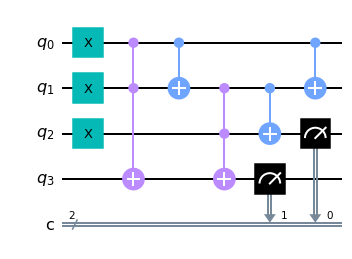

In [15]:
circ = QuantumCircuit(4,2)
# Input qubits: q[0], q[1], q[2]
# Initialised all qubits in state |1>
circ.x(0)
circ.x(1)
circ.x(2)

circ.ccx(0,1,3)
circ.cx(0,1)
circ.ccx(1,2,3)
circ.cx(1,2)
circ.cx(0,1)
circ.draw(output='mpl')
# Output qubits: sum = q[2], Carry = q[3]
circ.measure([2,3],[0,1])
circ.draw(output ='mpl')

# 1 + 1 + 1 = 11

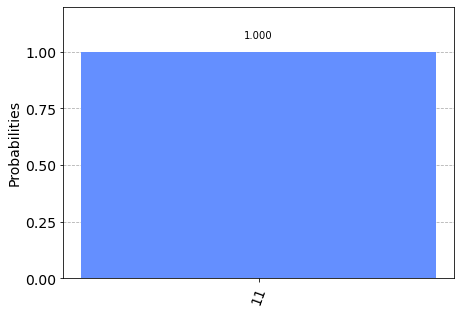

In [16]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
result = execute(circ,backend,shots=100).result()
counts = result.get_counts()
plot_histogram(counts)

In [17]:
# Calculating the cost
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller


def cost_function(circuit):
    if not isinstance(circuit, (QuantumCircuit)):
        print("the inserted circuit must be a QuantumCircuit object, not {}".format(type(circuit)))
    else:
        basis_gate_set = ['u3', 'cx'] # basis that we are unrolling the circuit into

        # changing our basis using an Unroller
        pass_ = Unroller(basis_gate_set)
        pm = PassManager(pass_)
        unrolled_circuit = pm.run(circuit)

        # calculating the cost function using the equation given above
        gates = unrolled_circuit.count_ops()
        circuit_cost = gates['u3'] + 10*gates['cx']
        
    return circuit_cost, gates, unrolled_circuit

In [18]:
circuit_cost, gates, unrolled_circuit = cost_function(circ)

print('Cost of the circuit : {}'.format(circuit_cost))
print('Gates counts after unrolling : {}'.format(gates))
print('Circuit after unrolling :')
unrolled_circuit.draw()

Cost of the circuit : 171
Gates counts after unrolling : OrderedDict([('u3', 21), ('cx', 15), ('measure', 2)])
Circuit after unrolling :


┌───────────┐                                               »
q_0: ─┤ U3(π,0,π) ├────────────────────────■──────────────────────»
      ├───────────┤                        │                      »
q_1: ─┤ U3(π,0,π) ├───■────────────────────┼───────────────────■──»
      ├───────────┤   │                    │                   │  »
q_2: ─┤ U3(π,0,π) ├───┼────────────────────┼───────────────────┼──»
     ┌┴───────────┴┐┌─┴─┐┌──────────────┐┌─┴─┐┌─────────────┐┌─┴─┐»
q_3: ┤ U3(π/2,0,π) ├┤ X ├┤ U3(0,0,-π/4) ├┤ X ├┤ U3(0,0,π/4) ├┤ X ├»
     └─────────────┘└───┘└──────────────┘└───┘└─────────────┘└───┘»
c: 2/═════════════════════════════════════════════════════════════»
                                                                  »
«                                         ┌─────────────┐                     »
«q_0: ──────────────────■─────────■───────┤ U3(0,0,π/4) ├────────■─────────■──»
«     ┌─────────────┐   │       ┌─┴─┐     ├─────────────┴┐     ┌─┴─┐     ┌─┴─┐»
«q_1: ┤ U3(0,0,π/4) ├───┼───────┤ X ├─────┤ U3(0,0,-π/4) ├─────┤ X ├─────┤ X ├»
«     └─────────────┘   │       └───┘     └──────────────┘     └───┘     └───┘»
«q_2: ──────────────────┼──────────────────────────────────────────────────■──»
«     ┌──────────────┐┌─┴─┐┌─────────────┐┌─────────────┐ ┌─────────────┐┌─┴─┐»
«q_3: ┤ U3(0,0,-π/4) ├┤ X ├┤ U3(0,0,π/4) ├┤ U3(π/2,0,π) ├─┤ U3(π/2,0,π) ├┤ X ├»
«     └──────────────┘└───┘└─────────────┘└─────────────┘ └─────────────┘└───┘»
«c: 2/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                                                   »
«q_0: ──────────────────────────────────────────────────────────────»
«                                                                   »
«q_1: ──────────────────■────────────────────────────────────────■──»
«                       │                      ┌─────────────┐   │  »
«q_2: ──────────────────┼───────────────────■──┤ U3(0,0,π/4) ├───┼──»
«     ┌──────────────┐┌─┴─┐┌─────────────┐┌─┴─┐├─────────────┴┐┌─┴─┐»
«q_3: ┤ U3(0,0,-π/4) ├┤ X ├┤ U3(0,0,π/4) ├┤ X ├┤ U3(0,0,-π/4) ├┤ X ├»
«     └──────────────┘└───┘└─────────────┘└───┘└──────────────┘└───┘»
«c: 2/══════════════════════════════════════════════════════════════»
«                                                                   »
«                                                   
«q_0: ───────────────────────────────────────────■──
«                    ┌─────────────┐           ┌─┴─┐
«q_1: ───────■───────┤ U3(0,0,π/4) ├───■────■──┤ X ├
«          ┌─┴─┐     ├─────────────┴┐┌─┴─┐┌─┴─┐└┬─┬┘
«q_2: ─────┤ X ├─────┤ U3(0,0,-π/4) ├┤ X ├┤ X ├─┤M├─
«     ┌────┴───┴────┐├─────────────┬┘└┬─┬┘└───┘ └╥┘ 
«q_3: ┤ U3(0,0,π/4) ├┤ U3(π/2,0,π) ├──┤M├────────╫──
«     └─────────────┘└─────────────┘  └╥┘        ║  
«c: 2/═════════════════════════════════╩═════════╩══
«                                      1         0

2 BINARY DIGIT ADDER

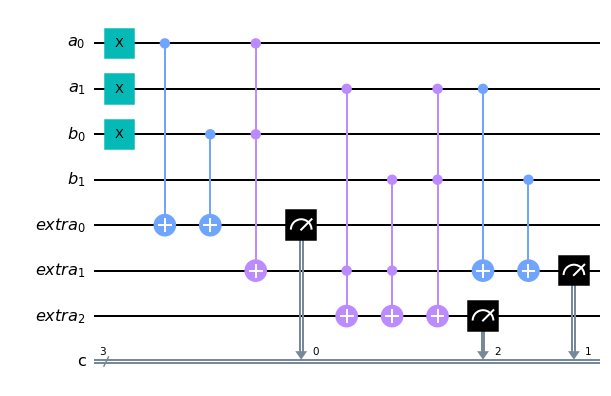

In [41]:

a = QuantumRegister(2,'a')
b = QuantumRegister(2,'b')
ext = QuantumRegister(3,'extra')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(a,b,ext,cr)
qc.x(a[0])
qc.x(a[1])
qc.x(b[0])

qc.cx(a[0],ext[0])
qc.cx(b[0],ext[0])


qc.ccx(a[0],b[0],ext[1])


qc.ccx(ext[1],a[1],ext[2])
qc.ccx(ext[1],b[1],ext[2])
qc.ccx(a[1],b[1],ext[2])

qc.cx(a[1],ext[1])
qc.cx(b[1],ext[1])




qc.measure([ext[0],ext[1],ext[2]],[cr[0],cr[1],cr[2]])
qc.draw(output='mpl')

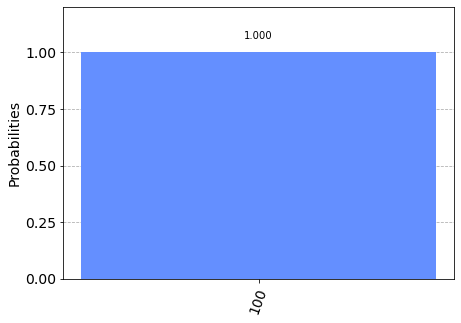

In [42]:
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend,shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)

In [44]:
circuit_cost, gates, unrolled_circuit = cost_function(qc)

print('Cost of the circuit : {}'.format(circuit_cost))
print('Gates counts after unrolling : {}'.format(gates))
print('Circuit after unrolling :')
unrolled_circuit.draw()

Cost of the circuit : 319
Gates counts after unrolling : OrderedDict([('u3', 39), ('cx', 28), ('measure', 3)])
Circuit after unrolling :


┌───────────┐                                                        »
    a_0: ─┤ U3(π,0,π) ├───■─────────────────────────────────────────────────■──»
          ├───────────┤   │                                                 │  »
    a_1: ─┤ U3(π,0,π) ├───┼────■────────────────────────────────────────────┼──»
          ├───────────┤   │    │                                            │  »
    b_0: ─┤ U3(π,0,π) ├───┼────┼─────────■──────────■───────────────────────┼──»
          └───────────┘   │    │         │          │                       │  »
    b_1: ─────────────────┼────┼─────────┼──────────┼───────────────────────┼──»
                        ┌─┴─┐  │       ┌─┴─┐        │  ┌─┐                  │  »
extra_0: ───────────────┤ X ├──┼───────┤ X ├────────┼──┤M├──────────────────┼──»
         ┌─────────────┐└───┘  │       └───┘      ┌─┴─┐└╥┘┌──────────────┐┌─┴─┐»
extra_1: ┤ U3(π/2,0,π) ├───────┼──────────────────┤ X ├─╫─┤ U3(0,0,-π/4) ├┤ X ├»
         ├─────────────┤     ┌─┴─┐┌──────────────┐└───┘ ║ └──────────────┘└───┘»
extra_2: ┤ U3(π/2,0,π) ├─────┤ X ├┤ U3(0,0,-π/4) ├──────╫──────────────────────»
         └─────────────┘     └───┘└──────────────┘      ║                      »
    c: 3/═══════════════════════════════════════════════╩══════════════════════»
                                                        0                      »
«                                                                 »
«    a_0: ──────────────────────────────────────■─────────■───────»
«                                               │         │       »
«    a_1: ──────────────────────────────────────┼─────────┼───────»
«                             ┌─────────────┐   │       ┌─┴─┐     »
«    b_0: ─────────────────■──┤ U3(0,0,π/4) ├───┼───────┤ X ├─────»
«                          │  └─────────────┘   │       └───┘     »
«    b_1: ─────────────────┼────────────────────┼─────────────────»
«                          │                    │                 »
«extra_0: ─────────────────┼────────────────────┼─────────────────»
«         ┌─────────────┐┌─┴─┐┌──────────────┐┌─┴─┐┌─────────────┐»
«extra_1: ┤ U3(0,0,π/4) ├┤ X ├┤ U3(0,0,-π/4) ├┤ X ├┤ U3(0,0,π/4) ├»
«         └─────────────┘└───┘└──────────────┘└───┘└─────────────┘»
«extra_2: ────────────────────────────────────────────────────────»
«                                                                 »
«    c: 3/════════════════════════════════════════════════════════»
«                                                                 »
«         ┌─────────────┐                                               »
«    a_0: ┤ U3(0,0,π/4) ├───■───────────────────────────────────────────»
«         └─────────────┘   │                      ┌─────────────┐      »
«    a_1: ──────────────────┼───────────────────■──┤ U3(0,0,π/4) ├──────»
«         ┌──────────────┐┌─┴─┐                 │  └─────────────┘      »
«    b_0: ┤ U3(0,0,-π/4) ├┤ X ├─────────────────┼───────────────────────»
«         └──────────────┘└───┘                 │                       »
«    b_1: ──────────────────────────────────────┼───────────────────────»
«                                               │                       »
«extra_0: ──────────────────────────────────────┼───────────────────────»
«         ┌─────────────┐                       │                       »
«extra_1: ┤ U3(π/2,0,π) ├───■───────────────────┼────────────────────■──»
«         └─────────────┘ ┌─┴─┐┌─────────────┐┌─┴─┐┌──────────────┐┌─┴─┐»
«extra_2: ────────────────┤ X ├┤ U3(0,0,π/4) ├┤ X ├┤ U3(0,0,-π/4) ├┤ X ├»
«                         └───┘└─────────────┘└───┘└──────────────┘└───┘»
«    c: 3/══════════════════════════════════════════════════════════════»
«                                                                       »
«                                                                            »
«    a_0: ───────────────────────────────────────────────────────────────────»
«              ┌───┐     ┌──────────────┐     ┌───┐          

In [ ]:
# Implementing on Quantum Computer

IBMQ.load_account() 

# Getting a backend for running the circuit on. In this case 'ibm_armonk'. For more devices you have access to you 
# can look into your IBM Q Experience account's dashboard.
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend("ibmq_5_yorktown")

In [ ]:
job = execute(qc,backend=backend,shots =1000)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
counts = job.result().get_counts()
plot_histogram(counts)

Grover's Algorithm

In [45]:
from qiskit.quantum_info import Operator
import numpy as np

In [46]:
def oracle(n, indices_to_mark):
    qc = QuantumCircuit(n, name = 'Oracle')
    
    oracle_matrix = np.identity(2**n)
    
    for i in indices_to_mark:
        oracle_matrix[i,i] = -1
    
    qc.unitary(Operator(oracle_matrix),range(n))
    
    return qc

In [47]:
def diffuser(n):
    qc = QuantumCircuit(n, name = "Diffuser")
    
    qc.h(range(n))
    
    qc.append(oracle(n,[0]),range(n))
    
    qc.h(range(n))
    
    return qc

In [48]:
def Grover(n, indices_of_marked_elem):
    qc = QuantumCircuit(n,n)
    
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices_of_marked_elem))))
    
    print(n, " qubits for basis states ",indices_of_marked_elem, " marked ",r, " rounds")
    
    qc.h(range(n))
    
    for i in range(r):
        qc.append(oracle(n, indices_of_marked_elem),range(n))
        qc.append(diffuser(n),range(n))
        
    qc.measure(range(n),range(n))
    
    return qc

5  qubits for basis states  [1, 14, 21]  marked  2  rounds


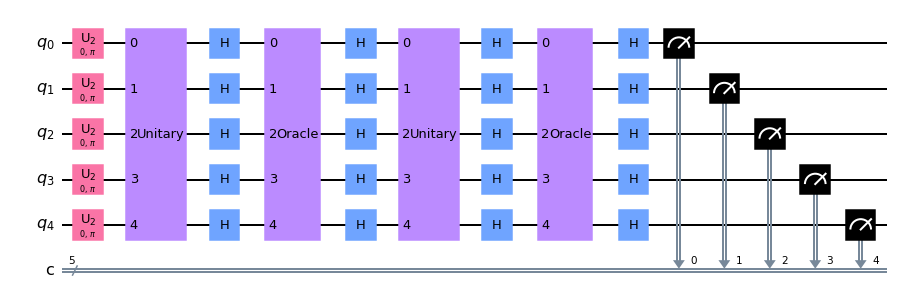

In [53]:
n = 5
l = [1, 14, 21]
circuit = Grover(n, l)
circuit.draw()
circuit_1 = circuit.decompose()
circuit_1.draw(output='mpl')

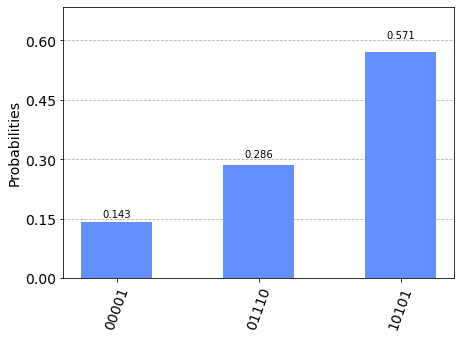

In [54]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(circuit,backend = backend, shots = 7).result().get_counts(circuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)